Support Vector Machine:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       212
         1.0       0.00      0.00      0.00         9

    accuracy                           0.96       221
   macro avg       0.48      0.50      0.49       221
weighted avg       0.92      0.96      0.94       221

Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       212
         1.0       1.00      0.11      0.20         9

    accuracy                           0.96       221
   macro avg       0.98      0.56      0.59       221
weighted avg       0.97      0.96      0.95       221



D:\Users\690-000BLA\Downloads\hola\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\690-000BLA\Downloads\hola\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Users\690-000BLA\Downloads\hola\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


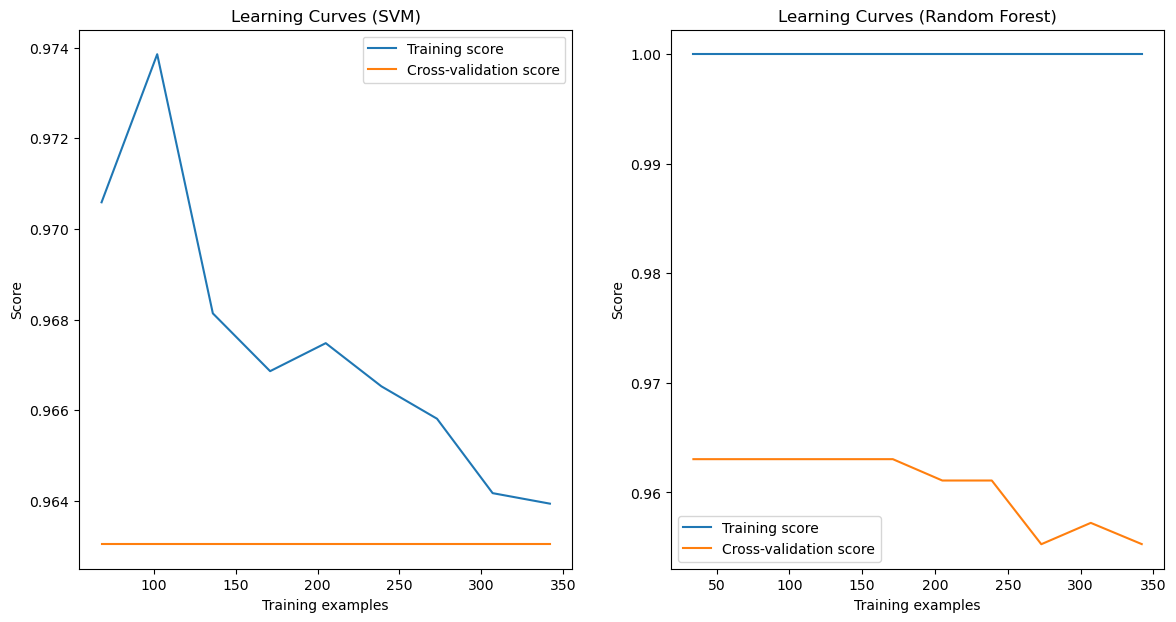

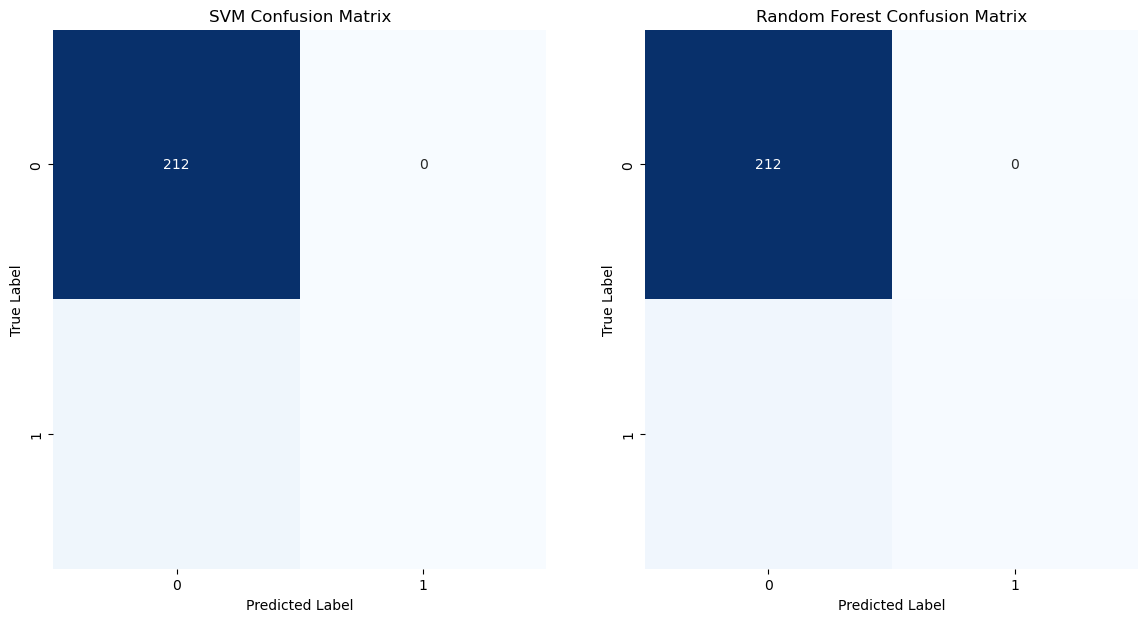

In [2]:
# 05 - comparación.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Cargar el conjunto de datos
file_path = 'dataset_02052023.xlsx'
df = pd.read_excel(file_path)

# Preprocesamiento
df.drop(['Timestamp', 'Num'], axis=1, inplace=True, errors='ignore')
if df['grip_lost'].dtype == 'object':
    df['grip_lost'] = df['grip_lost'].astype(int)
df.dropna(subset=['Robot_ProtectiveStop'], inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Dividir los datos en características y variable objetivo
X = df.drop('Robot_ProtectiveStop', axis=1)
y = df['Robot_ProtectiveStop']

# Reducir el tamaño del dataset para pruebas (10% del total)
X, _, y, _ = train_test_split(X, y, train_size=0.1, stratify=y, random_state=42)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Construir y ajustar el mejor modelo SVM
svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(C=1, gamma=0.1))
])
svm_pipe.fit(X_train, y_train)

# Construir y ajustar el mejor modelo Random Forest
rf_pipe = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20))
])
rf_pipe.fit(X_train, y_train)

# Evaluar los modelos en el conjunto de prueba
y_pred_svm = svm_pipe.predict(X_test)
y_pred_rf = rf_pipe.predict(X_test)

# Imprimir métricas de evaluación
print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Realizar curvas de aprendizaje
train_sizes_svm, train_scores_svm, valid_scores_svm = learning_curve(svm_pipe, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)
train_sizes_rf, train_scores_rf, valid_scores_rf = learning_curve(rf_pipe, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=3)

# Visualizar las curvas de aprendizaje
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(train_sizes_svm, np.mean(train_scores_svm, axis=1), label='Training score')
plt.plot(train_sizes_svm, np.mean(valid_scores_svm, axis=1), label='Cross-validation score')
plt.title('Learning Curves (SVM)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_sizes_rf, np.mean(train_scores_rf, axis=1), label='Training score')
plt.plot(train_sizes_rf, np.mean(valid_scores_rf, axis=1), label='Cross-validation score')
plt.title('Learning Curves (Random Forest)')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend()

plt.show()

# Comparar el desempeño de los modelos
# Visualizar la matriz de confusión
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()
